In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
alpha = 0.05

import matplotlib.pyplot as plt
import seaborn as sns




import graphviz
import acquire
import prepare
from graphviz import Graph

from prepare import prep_titanic_data

### Acquire Data of Telco Churn

In [2]:
df = acquire.get_telco_data()
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,Yes,Yes,1,Yes,...,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,2,3,1,9967-ATRFS,Female,0,No,No,19,Yes,...,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,4,3,1,9970-QBCDA,Female,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,2,3,1,9975-SKRNR,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,18.90,18.9,No,Month-to-month,None,Mailed check


### Prepare Data of Telco Churn

In [3]:
# Information on Telco Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
 # Drop duplicate columns
df.drop(columns=['payment_type_id', 'internet_service_type_id',
            'contract_type_id', 'customer_id'], inplace=True)


In [5]:
df.shape

(7043, 20)

In [6]:
 # Drop null values stored as whitespace
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [7]:
df.shape

(7032, 20)

In [8]:
# Convert to correct datatype
df['total_charges'] = df.total_charges.astype(float)

In [9]:
 # Convert binary categorical variables to numeric
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map(
        {'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [10]:
  # Get dummies for non-binary categorical variables
dummy_df = pd.get_dummies(df[['multiple_lines',
                              'online_security',
                                  'online_backup',
                                  'device_protection',
                                  'tech_support',
                                  'streaming_tv',
                                  'streaming_movies',
                                  'contract_type',
                                  'internet_service_type',
                                  'payment_type']], dummy_na=False,
                              drop_first=True)

In [11]:
# Concatenate dummy dataframe to original
df = pd.concat([df, dummy_df], axis=1)

In [12]:
# Let's check information to make sure that changes applied has acted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   object 
 1   senior_citizen                         7032 non-null   int64  
 2   partner                                7032 non-null   object 
 3   dependents                             7032 non-null   object 
 4   tenure                                 7032 non-null   int64  
 5   phone_service                          7032 non-null   object 
 6   multiple_lines                         7032 non-null   object 
 7   online_security                        7032 non-null   object 
 8   online_backup                          7032 non-null   object 
 9   device_protection                      7032 non-null   object 
 10  tech_support                           7032 non-null   object 
 11  stre

### Splitting Data
Now we have cleaned the data, now we can split the data into train, validate and test dataframes.

In [13]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2,
                                            random_state=123,
                                            stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.2,
                                       random_state=123,
                                       stratify=train_validate.churn)
    return train, validate, test

In [14]:
# split the data
train, validate, test = split_telco_data(df)

In [15]:
train.shape

(4500, 47)

In [16]:
validate.shape

(1125, 47)

In [17]:
test.shape

(1407, 47)

In [18]:
# Lets define a single function that will give us all these, while calling it.
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id',
            'contract_type_id', 'customer_id'], inplace=True)

    # Drop null values stored as whitespace
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']

    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)

    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map(
        {'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines',
                              'online_security',
                                  'online_backup',
                                  'device_protection',
                                  'tech_support',
                                  'streaming_tv',
                                  'streaming_movies',
                                  'contract_type',
                                  'internet_service_type',
                                  'payment_type']], dummy_na=False,
                              drop_first=True)

    # Concatenate dummy dataframe to original
    df = pd.concat([df, dummy_df], axis=1)

    # split the data
    train, validate, test = split_telco_data(df)

    return train, validate, test

In [19]:
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,0,0,1
1,Male,0,No,No,54,No,No phone service,Yes,No,No,...,1,0,0,0,1,0,0,1,0,0
2,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,...,0,0,0,0,1,0,0,1,0,0
4,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
7039,Female,0,No,No,19,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
7040,Female,0,No,No,6,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,1,0,0
7041,Male,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1


### Exploratory Data Analysis

- Questions ???
- Is gender the driving factor for churn?
- Is internet service type driving factor for churn?
- Is monthly charges driving factor for churn?
- Is payment type driving factor for churn?
- Is senior citizen driver for churn?

In [20]:
# Splitting data to know whether they churn or not

churn = df[df['churn_encoded'] == 1]
no_churn = df[df['churn_encoded'] == 0]

In [21]:
# Counts of churn and no churn customers
print(churn.shape)
print(no_churn.shape)

(1869, 47)
(5163, 47)


In [22]:
# Counts of churn and no churn customers from train data frames
train.churn_encoded.value_counts()

0    3304
1    1196
Name: churn_encoded, dtype: int64

<AxesSubplot:xlabel='churn_encoded', ylabel='count'>

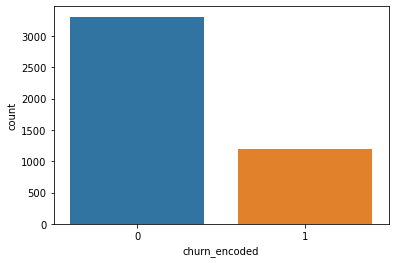

In [23]:
# Visualize churn from train data
sns.countplot(train['churn_encoded'])

In [24]:
# What percentage of customers churn from train data
cust_no_churn = train[train.churn_encoded == 0].shape[0]
cust_churn = train[train.churn_encoded == 1].shape[0]

print(cust_no_churn)
print(cust_churn)

3304
1196


In [25]:
print(f'Percentage of customer churned : {round((cust_churn/(cust_churn + cust_no_churn)) *100, 2)} % of train customers')
print(f'Percentage of customer not churned : {round((cust_no_churn/(cust_churn + cust_no_churn)) *100, 2)} % of train customers')

Percentage of customer churned : 26.58 % of train customers
Percentage of customer not churned : 73.42 % of train customers


### Based on this we can tell that when we build a model, the model should have accuracy of telling whether a given customer will not churn by more than 73.42% accuracy

### 1. Is gender the driving factor for churn?

<AxesSubplot:xlabel='gender', ylabel='count'>

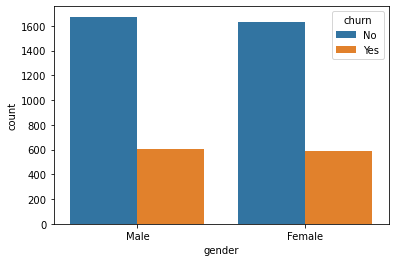

In [26]:
# Visualize the churn count for males and females
sns.countplot(x = 'gender', hue = 'churn', data = train)

 Based on this visualization, we can tell that gender has nothing to do with churn rate.

### 2. Is internet service type driving factor for churn?

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

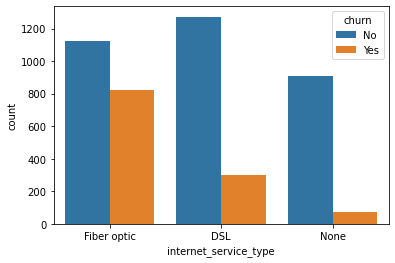

In [27]:
sns.countplot(x= 'internet_service_type', hue = 'churn', data = train)

### Based on this visualization, we can tell that customers with Fiber Optic internet service has highest churn rate. 

### 3. Is monthly charges driving factor for churn?

array([<AxesSubplot:title={'center':'monthly_charges'}>,
       <AxesSubplot:title={'center':'tenure'}>], dtype=object)

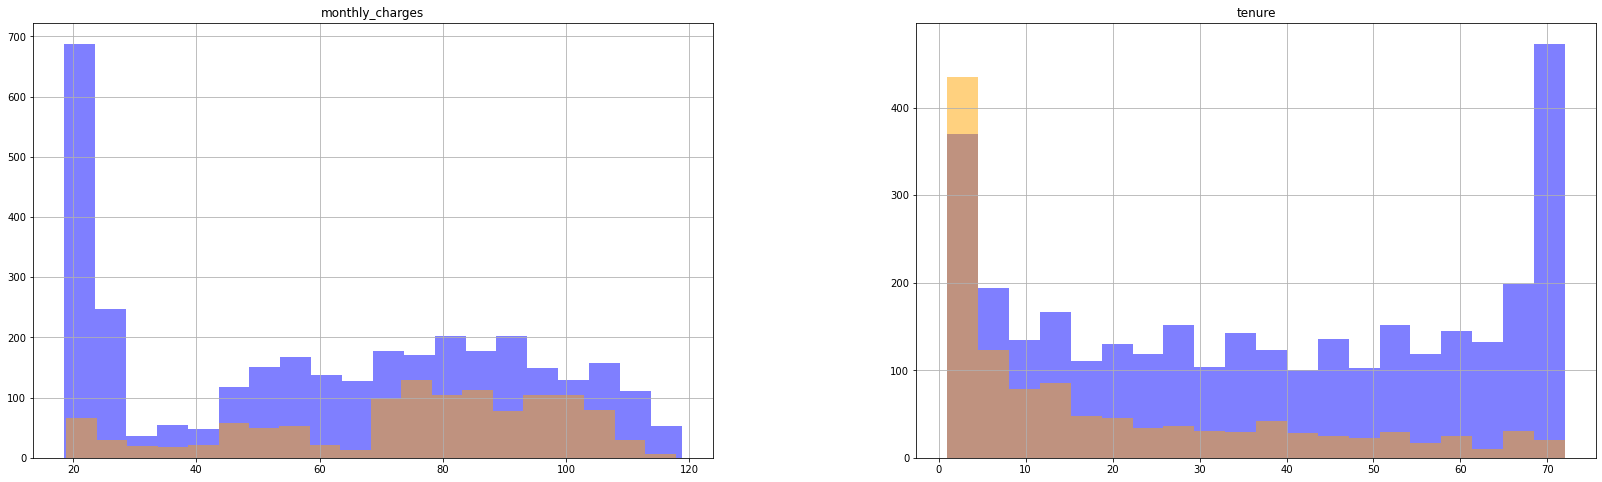

In [28]:
numerical_features = ['monthly_charges', 'tenure']
fig, ax = plt.subplots(1, 2, figsize = (28, 8))
train[train.churn == 'No'][numerical_features].hist(bins = 20, color = 'blue', alpha = 0.5, ax = ax)
train[train.churn == 'Yes'][numerical_features].hist(bins = 20, color = 'orange', alpha = 0.5, ax = ax)

### Based on this visualization, we can tell that churn rate is high for customers having monthly charges of USD. 70 to USD. 100.

### 4. Is payment type driving factor for churn?

<AxesSubplot:xlabel='payment_type', ylabel='count'>

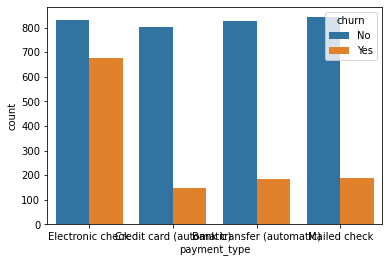

In [29]:
sns.countplot(x= 'payment_type', hue = 'churn', data = train)

### Based on this diagram, we can say that customers with Electronic Check as payment as more churn date.

### 5. Is senior citizen driver for churn?

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

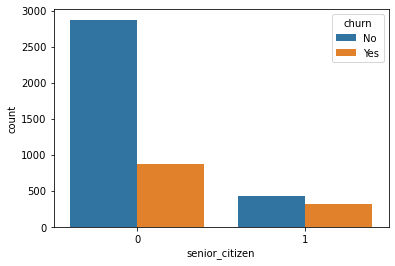

In [30]:
sns.countplot(x = 'senior_citizen', hue = 'churn', data = train)

### Based on the diagram, we can tell that more portion of senior citizen churn than non senior citizen.

# Statistical Tests

### 1. Is gender the driving factor for churn?

H0: churn and gender independent

H1: churn and gender not independednt

Create Observation Table

Use Chi^2 to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

In [31]:
# Make observation table

index = ['Churn', 'No Churn']
columns = ['Gender=1', 'Gender=0']

gender_observed = pd.DataFrame([[churn.gender_encoded.value_counts()[1], churn.gender_encoded.value_counts()[0]], [no_churn.gender_encoded.value_counts()[1], no_churn.gender_encoded.value_counts()[0]]], index=index, columns=columns)
gender_observed

,Gender=1,Gender=0
Churn,939,930
No Churn,2544,2619


In [32]:
gender_chi2, gender_p, gender_degf, gender_expected = stats.chi2_contingency(gender_observed)

print('Observed\n')
print(gender_observed.values)
print('---\nExpected\n')
print(gender_expected)
print('---\n')
print(f'chi^2 = {gender_chi2:.4f}')
print(f'p     = {gender_p:.4f}')
if gender_p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed

[[ 939  930]
 [2544 2619]]
---
Expected

[[ 925.72909556  943.27090444]
 [2557.27090444 2605.72909556]]
---

chi^2 = 0.4755
p     = 0.4905
We fail to reject the null hypothesis


### 2. Is internet service type driving factor for churn?

H0: Churn and fiber optic internet are independent

H1: Churn and Fiber are dependent

Create Observation Table

Use Chi^2 to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

In [33]:
# Make observation table

index = ['Churn', 'No Churn']
columns = ['Fiber=1', 'Fiber=0']


fiber_observed = pd.DataFrame([[716, 330], [982, 1901]], index=index, columns=columns)
fiber_observed

,Fiber=1,Fiber=0
Churn,716,330
No Churn,982,1901


In [34]:
fiber_chi2, fiber_p, fiber_degf, fiber_expected = stats.chi2_contingency(fiber_observed)

print('Observed\n')
print(fiber_observed.values)
print('---\nExpected\n')
print(fiber_expected)
print('---\n')
print(f'chi^2 = {fiber_chi2:.4f}')
print(f'p     = {fiber_p:.4f}')
if fiber_p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed

[[ 716  330]
 [ 982 1901]]
---
Expected

[[ 452.05090354  593.94909646]
 [1245.94909646 1637.05090354]]
---

chi^2 = 368.4902
p     = 0.0000
We can reject the null hypothesis


### 3. Is monthly charges driving factor for churn?

H0: Churn is independent to monthly charges
H1: Churn is not independent to monthly charges

In [35]:

observed_data = pd.crosstab(train.churn_encoded, train['monthly_charges'])
chi2, p, degf, expected = stats.chi2_contingency(observed_data)
chi2, p, degf, expected
if p<alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


 ### 4.  Do seniors churn at a different rate?

H0: Churn independent of senior status

H1: Churn dependent on senior status

Create Observation Table

Use Chi^2 to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

In [36]:
# Make observation table

index = ['Churn', 'No Churn']
columns = ['Senior=1', 'Senior=0']

senior_observed = pd.DataFrame([[churn.senior_citizen.value_counts()[1], churn.senior_citizen.value_counts()[0]], [no_churn.senior_citizen.value_counts()[1], no_churn.senior_citizen.value_counts()[0]]], index=index, columns=columns)
senior_observed

,Senior=1,Senior=0
Churn,476,1393
No Churn,666,4497


In [37]:
senior_chi2, senior_p, senior_degf, senior_expected = stats.chi2_contingency(senior_observed)
alpha = 0.05

print('Observed\n')
print(senior_observed.values)
print('---\nExpected\n')
print(senior_expected)
print('---\n')
print(f'chi^2 = {senior_chi2:.4f}')
print(f'p     = {senior_p:.4f}')
if senior_p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed

[[ 476 1393]
 [ 666 4497]]
---
Expected

[[ 303.52645051 1565.47354949]
 [ 838.47354949 4324.52645051]]
---

chi^2 = 158.4408
p     = 0.0000
We can reject the null hypothesis


### Modeling

- Create a baseline model using the available data
- Using various algorithms, create classification models. We will create a baseline model first

In [38]:
# What percentage of customers churn from train data
cust_no_churn = train[train.churn_encoded == 0].shape[0]
cust_churn = train[train.churn_encoded == 1].shape[0]

print(cust_no_churn)
print(cust_churn)

3304
1196


In [39]:
print(f'Percentage of customer churned : {round((cust_churn/(cust_churn + cust_no_churn)) *100, 2)} % of train customers')
print(f'Percentage of customer not churned : {round((cust_no_churn/(cust_churn + cust_no_churn)) *100, 2)} % of train customers')

Percentage of customer churned : 26.58 % of train customers
Percentage of customer not churned : 73.42 % of train customers


In [44]:
# Lets do some math to create a baseline model
# Category with highest count is considered to be a positive prediction
# So our baseline model will predict those that wont churn


baseline_accuracy = cust_no_churn/len(train)*100 
baseline_accuracy 


print(f'The accuracy of our baseline model to predict customers that wont churn is: {round(baseline_accuracy, 2)},)% ')

The accuracy of our baseline model to predict customers that wont churn is: 73.42,)% 


In [90]:
def feature_target_selector(features, target, train=train, validate=validate, test=test):
    X_train = train[features]
    y_train = train[target]
    X_validate = validate[features]
    y_validate = validate[target]
    X_test = test[features]
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [91]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 3968 to 4011
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 4500 non-null   object 
 1   senior_citizen                         4500 non-null   int64  
 2   partner                                4500 non-null   object 
 3   dependents                             4500 non-null   object 
 4   tenure                                 4500 non-null   int64  
 5   phone_service                          4500 non-null   object 
 6   multiple_lines                         4500 non-null   object 
 7   online_security                        4500 non-null   object 
 8   online_backup                          4500 non-null   object 
 9   device_protection                      4500 non-null   object 
 10  tech_support                           4500 non-null   object 
 11  s

In [95]:
features = ['senior_citizen', 'monthly_charges', 'tenure', 'paperless_billing_encoded', 'internet_service_type_Fiber optic', 'payment_type_Electronic check']
target = ['churn_encoded']
X_train, y_train, X_validate, y_validate, X_test, y_test = feature_target_selector(features, target)

In [99]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

### Logistic Regression
### Model 1

In [101]:
logit = LogisticRegression(random_state=123, solver='lbfgs')
logit.fit(X_train, y_train)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.48124359  0.01020993 -0.0445919   0.47562694  0.9078825   0.52509706]]
Intercept: 
 [-1.56886161]


In [102]:
y_pred1 = logit.predict(X_train)
y_pred1_proba = logit.predict_proba(X_train)

In [103]:
confusion_matrix(y_train, y_pred1)

array([[3015,  289],
       [ 631,  565]])

In [104]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3304
           1       0.66      0.47      0.55      1196

    accuracy                           0.80      4500
   macro avg       0.74      0.69      0.71      4500
weighted avg       0.78      0.80      0.78      4500



In [110]:
tp=565 
tn = 3015
fn=631
fp=289

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

print('F1 score of Logistic Regression classifier on training set: {:.2f}'
     .format(f1_score(y_train, y_pred1)))

recall_logit = tp/(tp+fn)

print('Recall of Logistic Regression classifier on training set: {:.2f}'
     .format(recall_logit))

Accuracy of Logistic Regression classifier on training set: 0.80
F1 score of Logistic Regression classifier on training set: 0.55
Recall of Logistic Regression classifier on training set: 0.47


### Decision Tree
### Model 2

In [154]:
# keeping max_depth as 10 and creating our model

clf2 = DecisionTreeClassifier(max_depth = 10, random_state = 123)

In [155]:
# fitting our model

clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=123)

In [156]:
# Calculating accuracy

clf2.score(X_train, y_train)

0.8655555555555555

In [157]:
# predicting y 

y_pred2 = clf3.predict(X_train)

In [158]:
# Classification Report 

print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3304
           1       0.80      0.66      0.72      1196

    accuracy                           0.87      4500
   macro avg       0.84      0.80      0.82      4500
weighted avg       0.86      0.87      0.86      4500



### Model 2 accuracy = 87%

### Model 3

In [122]:
# keeping max_depth as 7and creating our model

clf4 = DecisionTreeClassifier(max_depth = 7, random_state = 129)

In [123]:
# fitting our model

clf4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=129)

In [125]:
# Calculating accuracy

clf4.score(X_train, y_train)

0.8188888888888889

In [126]:
# predicting y 

y_pred4 = clf4.predict(X_train)

In [127]:
# Classification Report 

print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3304
           1       0.69      0.58      0.63      1196

    accuracy                           0.82      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.81      0.82      0.81      4500



### Model 3 accuracy = 82%
### Random Forest

### Model 4

In [128]:
# creating a model with max_depth of 5, and min samples leaf of 5


rf1 = RandomForestClassifier(random_state = 139, max_depth = 5, min_samples_leaf = 5)

In [129]:
# fitting our model

rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=139)

In [131]:
# Calculate accuracy

rf1.score(X_train, y_train)

0.8013333333333333

In [132]:
# Predicting y

y_pred5 = rf1.predict(X_train)

In [133]:
# Classification Report

print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3304
           1       0.70      0.44      0.54      1196

    accuracy                           0.80      4500
   macro avg       0.76      0.69      0.71      4500
weighted avg       0.79      0.80      0.79      4500



### Model 4 accuracy = 80%
### Model 5

In [161]:
# creating a model with max_depth of 7, and min samples leaf of 10

rf5 = RandomForestClassifier(random_state = 139, max_depth = 7, min_samples_leaf = 10)

In [162]:
# fitting our model

rf5.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=10, random_state=139)

In [138]:
# Calculate accuracy

rf5.score(X_train, y_train)

0.8135555555555556

In [163]:
# Predicting y

y_pred5 = rf5.predict(X_train)

In [164]:
# Classification Report

print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3304
           1       0.72      0.50      0.59      1196

    accuracy                           0.81      4500
   macro avg       0.78      0.71      0.73      4500
weighted avg       0.80      0.81      0.80      4500



### Model 5 accuracy = 81%
### KNN

### Model 6

In [141]:
# creating a KNN model


knn1 = KNeighborsClassifier(n_neighbors = 10)

In [142]:
# fitting our model

knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [143]:
# Calculating accuracy


knn1.score(X_train, y_train)

0.8084444444444444

In [144]:
# predicting y

y_pred7 = knn1.predict(X_train)

In [145]:
# Classification Report

print(classification_report(y_train, y_pred7))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3304
           1       0.73      0.44      0.55      1196

    accuracy                           0.81      4500
   macro avg       0.78      0.69      0.71      4500
weighted avg       0.80      0.81      0.79      4500



### Model 6 accuracy = 81%
### Model 7

In [166]:
# creating a KNN model

knn7 = KNeighborsClassifier(n_neighbors = 5)

In [167]:
# fitting our model

knn7.fit(X_train, y_train)

KNeighborsClassifier()

In [168]:
# Calculating accuracy


knn7.score(X_train, y_train)

0.8388888888888889

In [169]:
# predicting y

y_pred7 = knn2.predict(X_train)

In [170]:
# Classification Report

print(classification_report(y_train, y_pred7))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3304
           1       0.75      0.60      0.66      1196

    accuracy                           0.84      4500
   macro avg       0.81      0.76      0.78      4500
weighted avg       0.83      0.84      0.83      4500



### Model 7 accuracy = 84%

### We will use one of the best model from each algorithnm to validate dataset

### Validate with logistic model; Model 1

In [152]:
print("Model 1: Logistic Regression")

print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

y_pred1 = logit.predict(X_validate)

print(confusion_matrix(y_validate, y_pred1))

print(classification_report(y_validate, y_pred1))

Model 1: Logistic Regression
Accuracy: 0.79
[[749  77]
 [155 144]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       826
           1       0.65      0.48      0.55       299

    accuracy                           0.79      1125
   macro avg       0.74      0.69      0.71      1125
weighted avg       0.78      0.79      0.78      1125



In [160]:
print("Model 2: Decision Tree")

print('Accuracy: {:.2f}'.format(clf2.score(X_validate, y_validate)))

y_pred2 = clf2.predict(X_validate)

print(confusion_matrix(y_validate, y_pred2))

print(classification_report(y_validate, y_pred2))

Model 2: Decision Tree
Accuracy: 0.77
[[717 109]
 [153 146]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       826
           1       0.57      0.49      0.53       299

    accuracy                           0.77      1125
   macro avg       0.70      0.68      0.69      1125
weighted avg       0.76      0.77      0.76      1125



In [173]:
print("Model 5: Random Forest")

print('Accuracy: {:.2f}'.format(rf5.score(X_validate, y_validate)))

y_pred5 = rf5.predict(X_validate)

print(confusion_matrix(y_validate, y_pred5))

print(classification_report(y_validate, y_pred5))

Model 5: Random Forest
Accuracy: 0.80
[[753  73]
 [148 151]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       826
           1       0.67      0.51      0.58       299

    accuracy                           0.80      1125
   macro avg       0.75      0.71      0.72      1125
weighted avg       0.79      0.80      0.79      1125



In [172]:
print("Model 5: Random Forest")

print('Accuracy: {:.2f}'.format(knn7.score(X_validate, y_validate)))

y_pred7 = knn7.predict(X_validate)

print(confusion_matrix(y_validate, y_pred7))

print(classification_report(y_validate, y_pred7))

Model 5: Random Forest
Accuracy: 0.76
[[717 109]
 [160 139]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       826
           1       0.56      0.46      0.51       299

    accuracy                           0.76      1125
   macro avg       0.69      0.67      0.68      1125
weighted avg       0.75      0.76      0.75      1125



### Out of all the models, we will choose the random forest model because it had the highest accuracy with validate data

### Test with random forest model: Model 5

In [175]:
print("Test Performance: Random Forest")

print('Accuracy: {:.4f}'.format(rf5.score(X_test, y_test)))

y_pred5 = rf5.predict(X_test)

print(confusion_matrix(y_test, y_pred5))

print(classification_report(y_test, y_pred5))F

Test Performance: Random Forest
Accuracy: 0.7974
[[949  84]
 [201 173]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.67      0.46      0.55       374

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407



### Baseline has an accuracy of 73.42%

### The developed logistic regression model has an accuracy of 80.00%

### Creating a csv to turn in

In [176]:
full_df = prep_telco_data_prediction(telco_original)

NameError: name 'prep_telco_data_prediction' is not defined

In [177]:
#concat the train, test, split dataset

#sort the dataframe by index



final_csv = pd.concat([train, test, validate ])


final_csv = final_csv.sort_index()

In [182]:
# creating x and y to predict the customers churn using the same variables we used to build the model




x_final = final_csv.drop(columns = ['senior_citizen', 'monthly_charges', 'tenure', 'paperless_billing_encoded', 'internet_service_type_Fiber optic', 'payment_type_Electronic check']

y_final = final_csv.churn

SyntaxError: invalid syntax (3813106335.py, line 8)